<a href="https://colab.research.google.com/github/kroppheather/utica_mapping/blob/Tf-keras/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from glob import glob
from keras_unet.models import custom_unet

In [117]:
base_dir = Path('/content/drive/MyDrive/utica')
mask_dir = base_dir.joinpath('mask')
train_image_dir = mask_dir.joinpath('u_train_reproject')
trees_mask_dir = mask_dir.joinpath('trees')
building_mask_dir = mask_dir.joinpath('building')
pavement_mask_dir = mask_dir.joinpath('pavement')

In [114]:
I, N, M = 16, 256, 256

In [111]:
os.listdir(mask_dir)

['pavement', 'u_train_reproject', 'trees', 'building']

In [64]:
def img_number(fpath: str) -> int:
    return int(os.path.splitext(os.path.split(fpath)[1])[0].split('_')[-1])

In [98]:
def load_image(path: str) -> np.ndarray:
    ds = gdal.Open(path, gdal.GA_ReadOnly)
    return ds.GetRasterBand(1).ReadAsArray()[6:-7,6:-6]

In [115]:
def sorted_paths(img_dir: Path):
    return sorted(glob(img_dir.joinpath('*.tif').as_posix()), key=img_number)

In [137]:
train_images = np.ndarray(shape=(I, N, M), dtype=np.float32)
tree_masks = np.ndarray(shape=(I, N, M), dtype=np.int8)
building_masks = np.ndarray(shape=(I, N, M), dtype=np.int8)
pavement_masks = np.ndarray(shape=(I, N, M), dtype=np.int8)

In [138]:
for i, path in enumerate(sorted_paths(train_image_dir)[:16]):
    train_images[i, :, :] = load_image(path)
for i, path in enumerate(sorted_paths(trees_mask_dir)[:16]):
    tree_masks[i, :, :] = load_image(path)
for i, path in enumerate(sorted_paths(building_mask_dir)[:16]):
    building_masks[i, :, :] = load_image(path)
for i, path in enumerate(sorted_paths(pavement_mask_dir)[:16]):
    pavement_masks[i, :, :] = load_image(path)

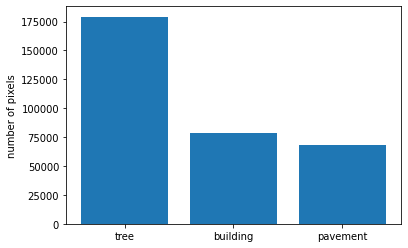

In [139]:
fig, ax = plt.subplots()
ax.bar(range(3), [tree_masks.sum(), building_masks.sum(), pavement_masks.sum()])
ax.set_xticks((0, 1, 2))
ax.set_xticklabels(('tree', 'building', 'pavement'))
plt.ylabel('number of pixels')
plt.show()

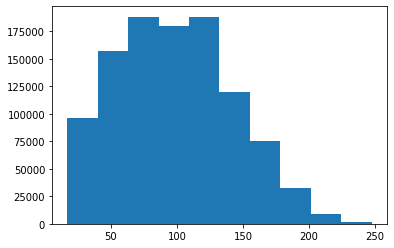

In [140]:
plt.hist(train_images.flatten())
plt.show()

(269, 268)

(269, 268)

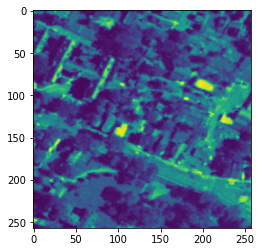

In [ ]:
plt.imshow(band2.ReadAsArray())